# <b><i>Lab 2</i></b> #

In [7]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## 3D Scatter plot using <b>Matplotlib</b> ##

In [8]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')
%matplotlib inline

Generating random data using numpy

In [9]:
# Data Preparation
np.random.seed(2023)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

clrs = ['red', 'green', 'blue', 'yellow', 'purple'] * 20
sz = np.random.randn(100) * 50

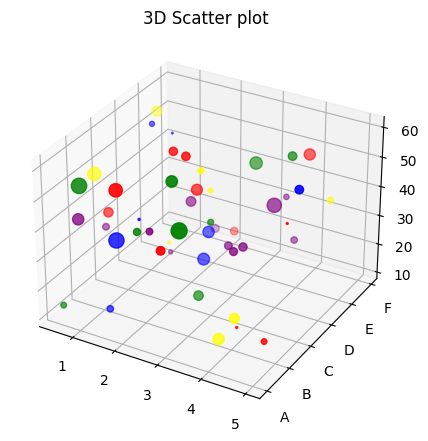

In [10]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs, c=clrs, s=sz)

ax.set(xticklabels=[0,1,2,3,4,5],
       yticklabels=['','A','B','C','D','E','F'],
       zticklabels=[0, 10, 20, 30, 40, 50, 60])
ax.set_title('3D Scatter plot')
plt.show()

## Clustermap using <b>Seaborn</b> ##

A cluster map is a combination of heatmap and dendrogram which is used to determine the variation in the data and clusters.

Reference:
https://www.tutorialspoint.com/seaborn/seaborn_clustermap_method.htm#:~:text=clustermap()%20method%20is%20used,the%20given%20data%20becomes%20difficult.

In [11]:
import seaborn as sns

sns.set_theme()

In [13]:
# Data preparation
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df1 = pd.read_csv(url)
df1.set_index('model', inplace=True)
df1.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear   
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4  \
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

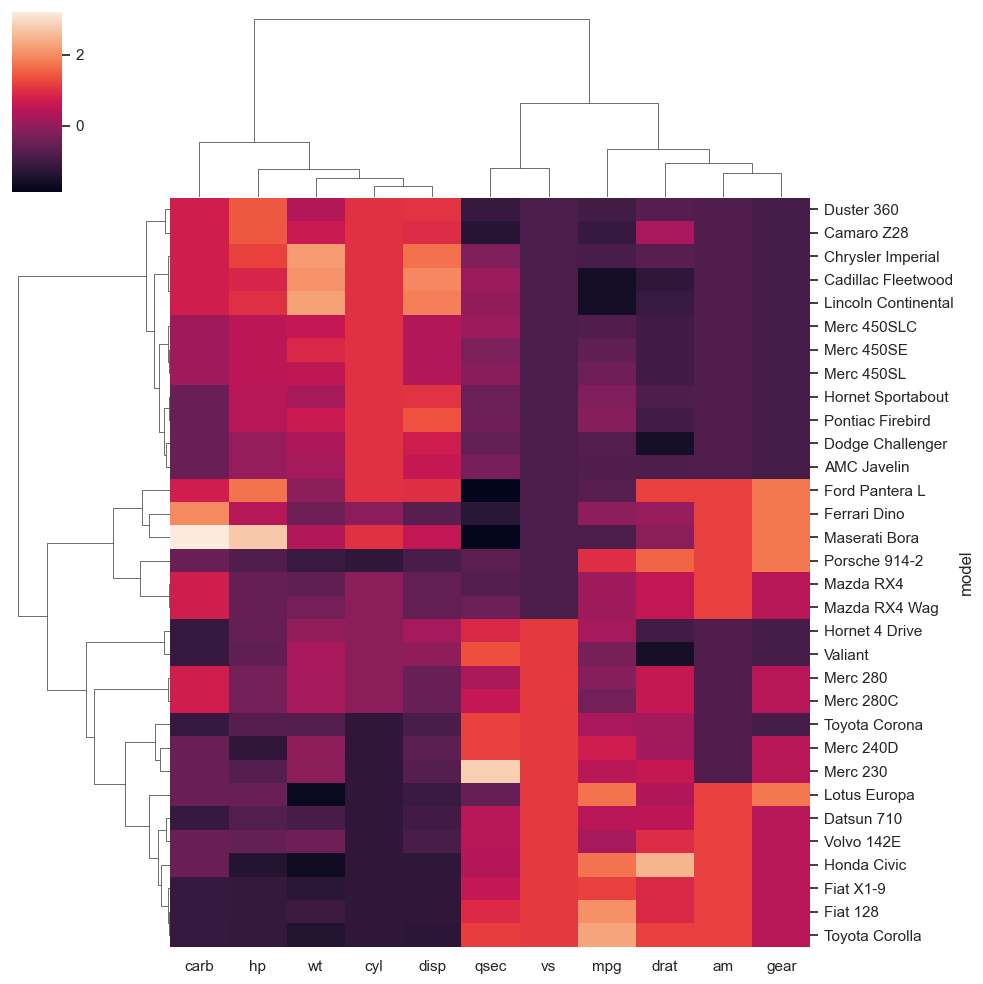

In [21]:
sns.clustermap(df1, z_score=1, metric='correlation')
plt.show()

This clustermap uses the correlation of the data which is standardized with z-score.<br>
The heatmap part shows the correlation of all the features for each car model.<br>
The top dendrogram shows the possible clusters in the features and left dendrogram shows the possible clusters in the car models

## A Pairplot using <b>Seaborn</b> ##

Pairplot is used to identify the pairwise relationship across the features <br>
Reference: https://pythonbasics.org/seaborn-pairplot/

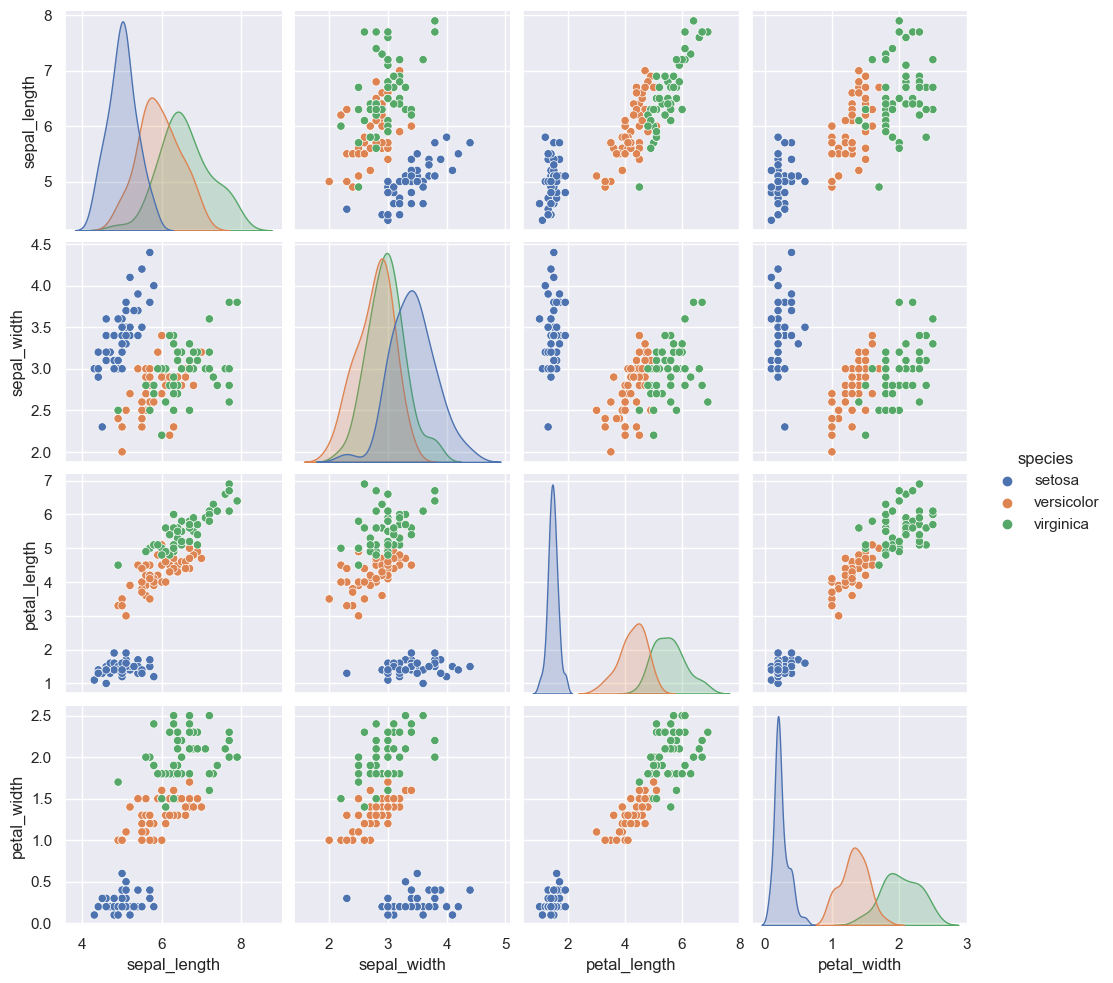

In [25]:
df2 = sns.load_dataset("iris")
sns.pairplot(df2, hue="species")
plt.show()

This plot shows the relationship of a features with all the other features. <br>
In case of the same features (in diagonal) it shows the distribution

## Dynamic 3D Scatter plot using <b>Plotly</b> ##

In [16]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

In [17]:
plotly.offline.init_notebook_mode()

Loading iris data

In [20]:
df = px.data.iris()
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [27]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Plotting a static 3d Scatter plot using matplotlib to show the difference between static and dynamic plots

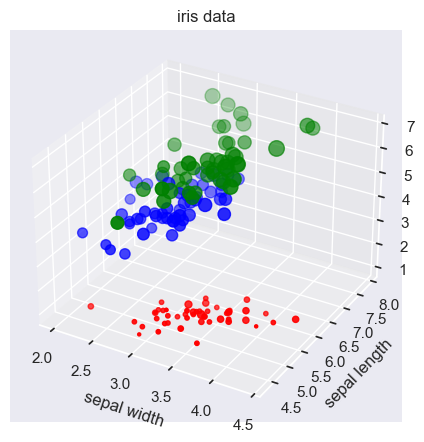

In [22]:
clrs = df['species'].apply({'setosa': 'Red', 'versicolor': 'Blue', 'virginica': 'Green'}.get)

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={"projection": "3d"})
ax.scatter(df['sepal_width'], df['sepal_length'], df['petal_length'], c=clrs, s=df['petal_width']*50)

ax.set_title('iris data')
ax.set_xlabel('sepal width')
ax.set_ylabel('sepal length')
ax.set_zlabel('petal length')
plt.show()

Predicting the petal width using sepal length and width. So that the actual and predicted values can be plotted

In [ ]:
# Data Preparation
X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = SVR(C=1.)
model.fit(X, y)

# Create a mesh grid on which we will run our model
mesh_size = .02
margin = 0

x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

In [19]:
# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()